In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow

from ultralytics.utils.plotting import Annotator, colors
from collections import defaultdict


In [ ]:
# Function to send alert emails
def send_alert(subject, body, to_email):
    from_email = "enter your email for sending mail"
    password = "16-digit password of that email generated by https://myaccount.google.com/apppasswords"

    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP('smtp.gmail.com: 587')
        server.starttls()
        server.login(from_email, password)
        text = msg.as_string()
        server.sendmail(from_email, to_email, text)
        server.quit()
        print("Alert sent successfully!")
    except Exception as e:
        print(f"Failed to send alert: {e}")

In [ ]:
# #Perform YOLOv8 object detection and count persons
# def detect_persons_yolo(model, frame):
#     results = model(frame)
#     person_count = 0
#     for result in results:
#         for bbox in result.boxes:
#             if bbox.cls == 0:  # YOLOv8 class ID for 'person' is 0
#                 person_count += 1
#                 # Convert tensor to list and unpack coordinates
#                 x1, y1, x2, y2 = map(int, bbox.xyxy[0].tolist())
#                 cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#                 cv2.putText(frame, 'Person', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
#     return person_count

In [ ]:
def detect_persons_yolo(model, frame):
    results = model(frame)
    person_count = 0

    annotator = Annotator(frame, line_width=2)

    results = model.track(frame, persist=True)

    if results[0].boxes.id is not None and results[0].masks is not None:
        masks = results[0].masks.xy
        track_ids = results[0].boxes.id.int().cpu().tolist()

        for mask, track_id in zip(masks, track_ids):

            annotator.seg_bbox(mask=mask, mask_color=colors(track_id, True), track_label=str(track_id))
            person_count += 1

    # if person_count > 0:
    #     print("Camouflage detected!")
    #     return "camouflage_detected"
    # else:
    #     print("No camouflage detected.")
    #     return "no_camouflage"
    return person_count

In [ ]:

# Camouflage detection function (example logic)
def detect_camouflage(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale frame
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Perform contour detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contour is found
    if contours:
        print("Camouflage detected!")
        return "camouflage_detected"
    else:
        print("No camouflage detected.")
        return "no_camouflage"

In [ ]:
model = YOLO("yolov8l-seg.pt")   # segmentation model
cap = cv2.VideoCapture('/content/2 sec sample video.mp4')
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

In [ ]:
#frame_width = int(cap.get(3))
#frame_height = int(cap.get(4))
#out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (frame_width, frame_height))

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'MJPG'), fps, (w, h))


Camouflage detected!

0: 384x640 5 persons, 2387.3ms
Speed: 5.6ms preprocess, 2387.3ms inference, 22.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2485.0ms
Speed: 4.5ms preprocess, 2485.0ms inference, 33.0ms postprocess per image at shape (1, 3, 384, 640)


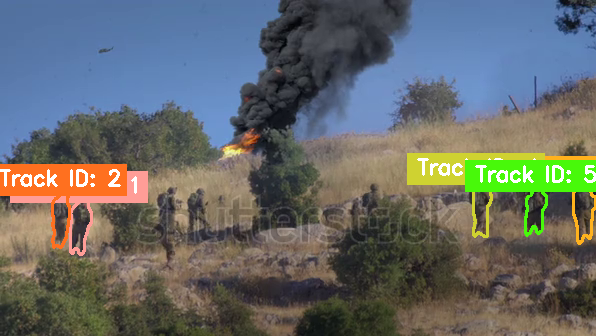

Alert sent successfully!
Camouflage detected!

0: 384x640 5 persons, 3028.7ms
Speed: 3.9ms preprocess, 3028.7ms inference, 21.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2453.4ms
Speed: 3.2ms preprocess, 2453.4ms inference, 36.6ms postprocess per image at shape (1, 3, 384, 640)


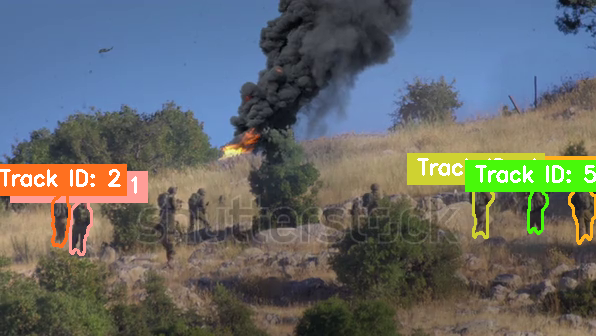

Alert sent successfully!
Camouflage detected!

0: 384x640 5 persons, 2569.1ms
Speed: 3.5ms preprocess, 2569.1ms inference, 22.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2741.5ms
Speed: 3.6ms preprocess, 2741.5ms inference, 47.7ms postprocess per image at shape (1, 3, 384, 640)


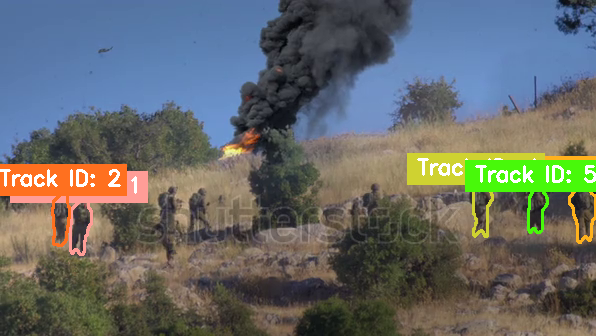

Alert sent successfully!
Camouflage detected!

0: 384x640 5 persons, 2811.3ms
Speed: 3.1ms preprocess, 2811.3ms inference, 31.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2466.9ms
Speed: 3.5ms preprocess, 2466.9ms inference, 39.9ms postprocess per image at shape (1, 3, 384, 640)


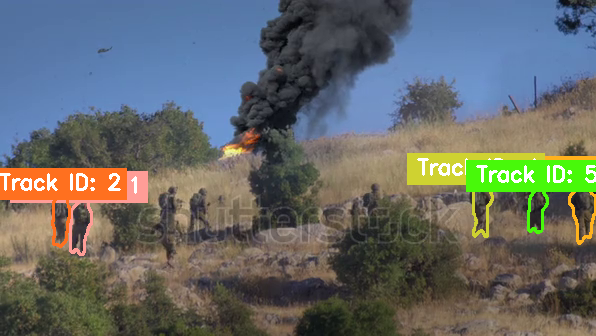

Alert sent successfully!
Camouflage detected!

0: 384x640 5 persons, 2454.8ms
Speed: 6.5ms preprocess, 2454.8ms inference, 32.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2738.9ms
Speed: 3.5ms preprocess, 2738.9ms inference, 86.2ms postprocess per image at shape (1, 3, 384, 640)


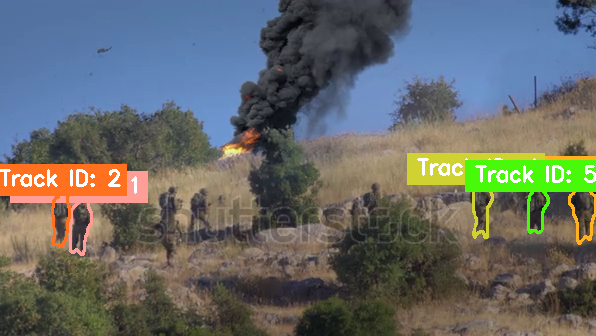

Alert sent successfully!
Camouflage detected!

0: 384x640 5 persons, 2745.5ms
Speed: 3.3ms preprocess, 2745.5ms inference, 24.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2400.4ms
Speed: 3.8ms preprocess, 2400.4ms inference, 42.5ms postprocess per image at shape (1, 3, 384, 640)


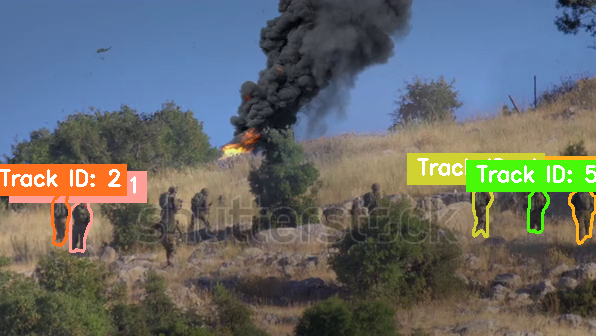

Alert sent successfully!
Camouflage detected!



KeyboardInterrupt: 

In [ ]:
if not cap.isOpened():
    print("Error: Could not open video")
else:
  while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
      break

    detection_result = detect_camouflage(frame)

    if detection_result == "camouflage_detected":

      person_count = detect_persons_yolo(model, frame)

      # Write the frame with detections to the output video
      out.write(frame)

      # Display the current frame (optional)
      cv2_imshow(frame)


      # Generate alert if camouflage is detected
      subject = "Alert!! Camouflage Detected"
      body = f"A camouflaged persons has been detected. Number of persons detected: {person_count}."
      to_email = "enter email address to receive the alert"
      send_alert(subject, body, to_email)
      #break  # Alert once and stop processing further frames


    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

    # Release the video capture and writer objects and close all OpenCV windows
  cap.release()
  out.release()
  cv2.destroyAllWindows()

# Download the output video
#files.download('output.avi')